# Housing Prices Prediction Model Building

**David Ye**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and results of your prediction model. Complete this portion of the template after you are done working on your project.

[Back to top](#Index)


## 1. Introduction

Introduce your project using 300 words or less. Describe all the processes you followed to solve the problem and create your prediction model. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.

*In this project I will build a model that predict house sale price according to its property, such as the year it is built, its overall quality, whether it has a garage or not, etc. The plan is to first import data, check the data to cleanse and prepare it for us to use. Then I will use correlation to find out the most important categories that relates to the sale price. Then I will fit all the variables into the model. And lastly, I will calculate the prediction and the accuracy score of the model, followed by some plotings.*

*This model is built with Python, with libraries pandas, numpy, and matplotlib.plt.
I first imported and checked the data to see how well it was and if there was any repairing that needed to be done. Then I checked the sale price and made it normal distribution, and used it to run some correlation graphs with some potential variables. Next I cleansed the nulls values and selected columns that are numerical as our independent variables. Then I found the correlation of the columns comparing to ‘SalePrice’, and I selected the top variables as independent variables. Then I fit the data of these variables into the model, Calculated the prediction and the accuracy score of the model. Then I plotted the predictions to see if it looks right. I also did some test runs by applying different variables, and decided the number of the top variables to optimize the outcome.*

[Back to top](#Index)

## 2. The Data

For each of the steps below, make sure you include a description of your steps as well as your complete code. 

[Back to top](#Index)

### 2.1 Import the Data

Import the necessary libraries and the data for the project. Include any auxiliary pandas *functions* that can be used to retrieve preliminary information about your data.

Make sure to include a description of the data.

*I simply imported pandas, numpy, matplotlib.pyplot, linear_model from sklearn and data "jtest.csv"*
*The data is called jtest, with 100 rows and 82 columns. Each row represents one house, and each column indicates one attribute of the house. Some of the columns are "overall quality", "Fireplace quality", "Original construction date", "RoofStyle", etc. Some of the columns are numerical, and some are not. This data also includes many missing values, which causes errors when we work with it.* 

In [41]:
import pandas as pd              #importing pandas
import numpy as np               #importing numpy
import matplotlib.pyplot as plt  #importing matplotlib
from sklearn import linear_model #importing linear_model from sklearn

#Importing data
data = pd.read_csv(r'C:\Users\yezhe\Desktop\Education\Programming\SQL\Class files\Projects\Project 1\jtest.csv') 
data.shape

(100, 82)

[Back to top](#Index)

### 2.2 Data Exploration

Create graphs displaying the relationships between the variables that you consider most important to solve the problem of predicting housing prices.


Include a description of the results displayed by each *plot*.

*During this step, I first graphed the distribution of "Sale Price" column, which is the key column for our model. I found out that the distribution of Sale Prices was not a normal distribution through plotting and "skew" function. So I applied log to these values and called it "newPrice", and the outcome looked much better. 
Then I used newPrice to run scatter plots with some of the potential variables such as "OverallQual" and "GrLivArea". Just as I predicted, these two variables were great variables for us to work with since they are correlated to our price.* 

In [42]:
data['SalePrice'].head()
SalePrice=data['SalePrice']

1.5252421671471026

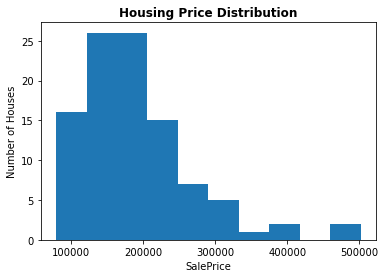

In [43]:
plt.hist(SalePrice)
plt.xlabel("SalePrice")
plt.ylabel("Number of Houses")
plt.title("Housing Price Distribution",fontweight="bold")
SalePrice.skew()

*As we can see from this plot of Sale Price that it is not in normal distribution.*

0.282432538265765

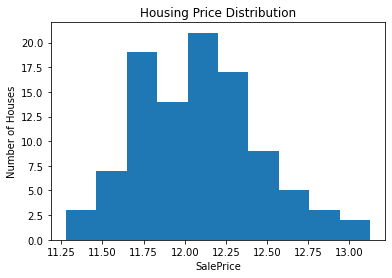

In [44]:
plt.hist(np.log(SalePrice))      #remember in the end that it is the log of the price, which looks much better
newPrice = np.log(SalePrice)   #transform it, and let's name our new SalePrice 'newPrice'
plt.xlabel("SalePrice")
plt.ylabel("Number of Houses")
plt.title("Housing Price Distribution")
np.log(newPrice).skew()    # it is 0.282, reduced significantly. #skew() returns unbiased skew over the requested axis   - which is 1.53, not very good

*We then tried using log to see how it looks like. So we took the log of sale price and plot it. The plot is more normally distributed. *

Text(0.5, 1.0, 'Price Distribution According to Overall Quality')

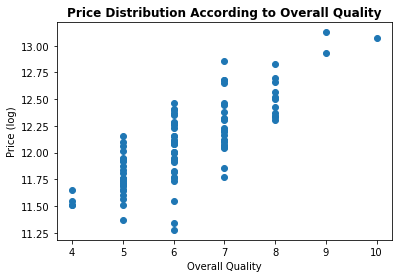

In [45]:
data.columns #view all the columns and consider potential independent variables
# Our goal is to use most columns such as LotArea, YrSold, etc as independent variable x, to predict the SalePrice as dependent variable Y
# If we have the independent variable data for a new house, we can predict its sale price

# let's make a prediction that 'OverallQual' might be the most important to solve this problem
plt.scatter(data['OverallQual'], y=newPrice)    # pull the train of the ground living area with a scatterplot against new price
plt.xlabel("Overall Quality")
plt.ylabel("Price (log)")
plt.title("Price Distribution According to Overall Quality",fontweight="bold")
# result shows OverallQual and SalePrice are correlated

*We then used this new price (Logged Sale Price) for a scatter plot with "Overall Quality". As we can see in the graph, as the overall quality raised, the price raised as well. They are in positive correlation! *

Text(0.5, 1.0, 'House Size according to Price')

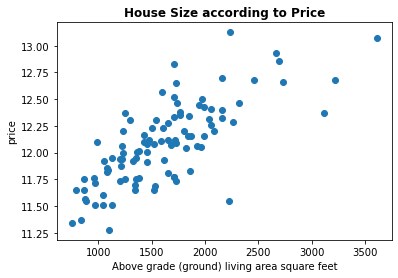

In [46]:
# let's make a prediction that 'GrLivArea' might be an important to solve this problem
plt.scatter(data['GrLivArea'], y=newPrice)
plt.xlabel("Above grade (ground) living area square feet")
plt.ylabel("price")
plt.title("House Size according to Price",fontweight='bold')
#result shows GrLivArea and SalePrice are correlated

*Our second attempt is by using "Ground Living Area". Using new price for a scatter plot with "Overall Quality" shows us a very good correlation between these variables.*

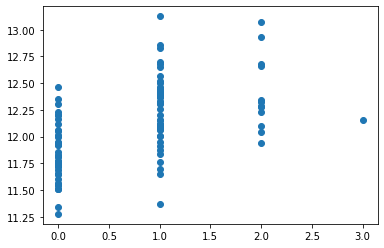

In [48]:
plt.scatter(data['Fireplaces'], y=newPrice)

*We used variable Fireplaces as our third prediction. As you can see, there is a house with 3.0 fireplaces with a medium price. So the fireplaces might be in correlation with sale price, but might not be a big factor.*

[Back to top](#Index)

### 2.3 Data Preparation

Determine if there are any missing values in the data. Did the data need to be reshaped? If yes, include a description of the steps you followed to clean the data.


*After some brainstorming, I still needed to prepare the data to make sure they are usable. So I dropped the columns with nulls, and used the columns with numeric variables for me to build the model. After this step, I found out that 38 columns can be used for our model.
Some functions I used were dropna(), select_dtypes(include=[np.number]), etc.*

In [49]:
# we cannot analyze null values, so we need to prepare the data and deal with these values
# let's see how many null values there are and how many columns include null values
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[0:20])   #displaying the top 20 columns includes null values

In [50]:
#let's clean the data by choosing all the columns that has no nulls
type(nulls)
cleandata = data.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
clean_data = cleandata[cleandata.columns[cleandata.sum() > 0]]
sum(clean_data.isnull().sum() !=0)
clean_data.shape
# we dropped the columns from 82 to 38

(100, 38)

In [51]:
# select numeric columns, then calculate correlation factor
numeric = clean_data.select_dtypes(include=[np.number])     #select all the numeric columns and use those for our model

[Back to top](#Index)

### 2.4 Correlation

Describe the correlation between the variables in your data. How can the correlation help you make an educated guess about how to proceed with your analysis? Will you explore different variables based on the correlation you found? If so, describe what you did and be sure to include what you found with the new set of variables.

*We will then run some tests and find out some variables in our data that correlates to sale price.*

In [52]:
#find correlations
corr = numeric.corr()       #Using only numeric column to find the correlations
relation = corr['SalePrice'].sort_values(ascending=False)[0:38]
cols = corr['SalePrice'].sort_values(ascending=False).index
#gives what correlated with Sale price, and out of them, pick the top 10 most correlated by sorting, and combine them
cols = cols.drop(['GarageYrBlt'])
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF', 'Fireplaces', 'BsmtFinSF1',
       'YearRemodAdd', 'LotArea', 'OpenPorchSF', 'FullBath', 'ScreenPorch',
       '2ndFlrSF', 'YearBuilt', 'BsmtFullBath', 'MasVnrArea', 'HalfBath',
       'WoodDeckSF', 'Id', 'Unnamed: 0', 'YrSold', 'LowQualFinSF', 'PoolArea',
       'BedroomAbvGr', 'BsmtFinSF2', 'MoSold', 'BsmtUnfSF', 'BsmtHalfBath',
       '3SsnPorch', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'MiscVal',
       'KitchenAbvGr'],
      dtype='object')

*After using running the code "relation", we found out that there are 8 columns have negative correlation with SalePrice. As we did some test runs, I found out the highest score comes with the most variables used. So in this model, we used all the columns as variables.*


[Back to top](#Index)

## 3. Project Description

Describe, using 150 words or less, how your analysis improves upon the analysis performed by Dr. Williams. Explain the variables that you analyzed, why you selected them, and what relationships you determined in your analysis.
Make sure you explain specifically what findings you derived from your analysis of the data.


*I started by selecting top 5 columns with greatest correlation with Sale Price, and received 79.34% as the result, which is not significantly high. As I increased the numbers of columns according to the order of correlation, the score gradually increased. The highest result I was able to get was by using all the available columns as variables to produce 93.78% accuracy.*

*The variables I used are: 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', '1stFlrSF', 'Fireplaces', 'BsmtFinSF1', 'YearRemodAdd', 'LotArea', 'OpenPorchSF', 'FullBath', 'ScreenPorch', '2ndFlrSF', 'YearBuilt', 'BsmtFullBath', 'MasVnrArea', 'HalfBath', 'WoodDeckSF', 'Id', 'Unnamed: 0', 'YrSold', 'LowQualFinSF', 'PoolArea', 'BedroomAbvGr', 'BsmtFinSF2', 'MoSold', 'BsmtUnfSF', 'BsmtHalfBath', '3SsnPorch', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'MiscVal', 'KitchenAbvGr'.*

[Back to top](#Index)

### 3.1 Linear Regression

Give a description (500 or less words) of the algorithm you use in this project. Include mathematical and computational details about linear regression.

Include details about the theory (origin of the method, derivation, and formulas) and the necessary steps to implement the algorithm using Python.



*The algorithm I used in this project is linear regression. Linear regression is a basic and commonly used type of predictive analysis, but it is also an incredible tool to analyzing data by estimating the relationship between variables. Three major uses for regression analysis are (1) determining the strength of predictors, (2) forecasting an effect, and (3) trend forecasting. The Simple linear regression has 1 dependent variable (y) and 1 independent variable(x), with the formula of y=mx+b. Multiple Linear Regression has 1 dependent variable (y) and multiple independent variables(x), with the formula of y = b0+b1 * x1+b2 * x2+b3 * x3...+e, where b is the y-intercept and e as error.
Here we are using multiple linear regression, with SalePrice as the dependent variable Y and the numeric columns as independent variables X.*

In [53]:
# let's workout linear regression by assigning X and Y
# while Y is the SalePrice as dependent variable, X are the other columns as the independent variables
X = data[cols]     
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)   #drop out sale price so X contains all the variables needed

[Back to top](#Index)

### 3.2 Analysis 

Implement the algorithm on your data according to the examples in Video 7.9 and Video 7.10.

Try to improve the results of your model analysis by including a different number of variables in your code for linear regression. Use what you learned about the correlation between variables when you explored your data to help you select these variables.

Compare the results of at least three different groups of variables. In other words, run a linear regression algorithm on at least three different sets of independent variables. How many variables to include in each set is up to you.

For each step, make sure you include your code. Ensure that your code is commented.





*From sklearn import linear_model, we are able to instantiate the linear regression model in python. Then, we are able to finish the model by fitting X and Y values into the model.
We changed the number of columns we used several times to optimize the model. We started with the top 5 variables correlate to Sale Price, and the model score was 79.34. As we increased to 8 variables, the model score increased to 80.3%. We then increased to top 10 variables, and the score raise to 83.54%. So the more variables we use, the more accurate the model is. I hit a bottleneck when I increased the variable up to 14, as there was an error since one of the 14th column contains a null. After I deleted that column, we are able to output all the columns. 
Even though there are 4 columns output negative correlation to Sale Price, the model score still increased as I included these columns in the model. Therefore I finalized my model using all the numeric columns, and the output was 93.78%*

In [54]:
# build Linear Regression Model
lr = linear_model.LinearRegression() #used to instantiate the linear regression model so it can be implemented
model = lr.fit(X,Y)                  #fit() fits the model according to the given training data
predictions = model.predict(X)       #predict() predicts class labels for samples in X

#test predictions on train data and also the entire data we did not use
# see how good the model is
model.score(X,Y)         #score()returns the mean accuracy score of our model
#output is 93.78% 

0.9378048002655835

(array([ 3.,  5., 12., 15., 21., 10., 11., 11.,  9.,  3.]),
 array([-45240.99242032, -36258.0024487 , -27275.01247708, -18292.02250546,
         -9309.03253384,   -326.04256222,   8656.94740941,  17639.93738103,
         26622.92735265,  35605.91732427,  44588.90729589]),
 <BarContainer object of 10 artists>)

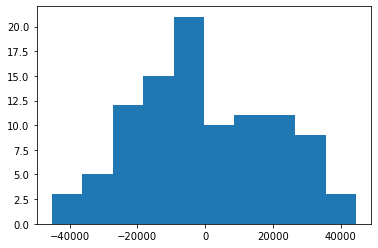

In [55]:
plt.hist(Y-predictions)     #predictions shows a normal distribution, which makes sense

Text(0, 0.5, 'Actual Price')

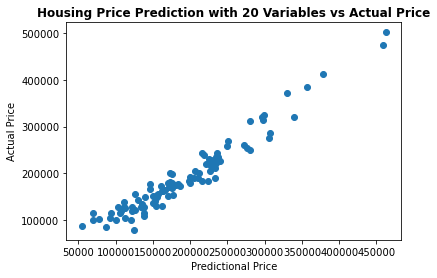

In [67]:
plt.scatter(predictions, Y)
plt.title("Housing Price Prediction with 20 Variables vs Actual Price", fontweight='bold')
plt.xlabel("Predictional Price")
plt.ylabel("Actual Price")

[Back to top](#Index)

### 3.3 Results

 What are your results? Which model performed better? Can you explain why? Include a detailed summary and a description of the metrics used to compute the accuracy of your predictions.

For each step, make sure you include your code. Ensure that your code is commented.



*As I mentioned earlier, the more variables I used, the more accurate the model becomes. Here is the code and graph of 5 variables including Sale Price:*

In [64]:
cols_5 = corr['SalePrice'].sort_values(ascending=False)[0:5].index
X_5 = data[cols_5]
Y = X_5['SalePrice']
X_5 = X_5.drop(['SalePrice'], axis = 1)
lr_5 = linear_model.LinearRegression() 
model_5 = lr.fit(X_5,Y)                  
predictions_5 = model_5.predict(X_5)
model.score(X_5,Y)
# the output of model score is 0.7934226676382521

0.7934226676382521

*As we see, when using 4 independent variables, the accuracy is only 79%. 
Here are the plots:*

(array([ 1.,  1.,  2.,  8., 26., 29., 21.,  6.,  5.,  1.]),
 array([-135287.14089979, -110494.1957631 ,  -85701.25062641,
         -60908.30548972,  -36115.36035303,  -11322.41521634,
          13470.52992035,   38263.47505704,   63056.42019372,
          87849.36533041,  112642.3104671 ]),
 <BarContainer object of 10 artists>)

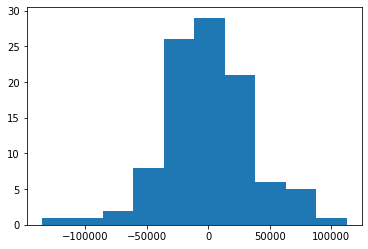

In [70]:
plt.hist(Y-predictions_5) 


*The range of the histogram is from over -100000 to over 100000. Therefore the first model is more accurate.*

Text(0, 0.5, 'Actual Price')

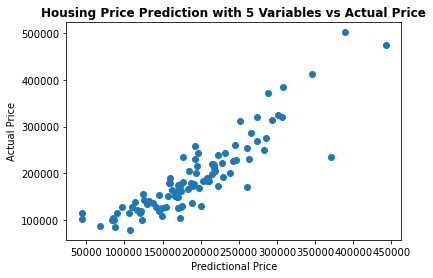

In [69]:
plt.scatter(predictions_5, Y)
plt.title("Housing Price Prediction with 5 Variables vs Actual Price",fontweight='bold')
plt.xlabel("Predictional Price")
plt.ylabel("Actual Price")

As you can see from the scatter plot, it is more scattered comparing to the scatter plot of the first model. This means it is less accurate. 

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

Now that you have a prediction model, it's time to test your model against test data to confirm its accuracy on new data. The test data is located in the file `jtest.csv` 

What do you observe? Are these results in accordance with what you found earlier? How can you justify this?

*I used the first 50 rows of data to compare the predicted price and the actual price by plotting them out. As one may see, there is a very small difference between two lines. Some of the values actually overlap, meaning the predicted price is extremely close to the actual price. Then I made a plot with the model I made with only 5 variables, and the difference was bigger.*

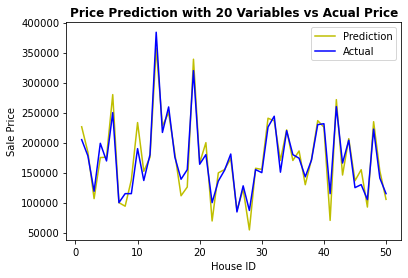

In [73]:
Ypredictions=predictions[0:50]
Yactual=SalePrice[0:50]
ID = list(range(1, 51))
plt.plot(ID, Ypredictions, 'y', label="Prediction")
plt.plot(ID, Yactual, 'b', label="Actual")
plt.xlabel('House ID') 
plt.ylabel('Sale Price') 
plt.title("Price Prediction with 20 Variables vs Acual Price", 
          fontweight='bold')
leg = plt.legend(loc='upper right')
plt.show()

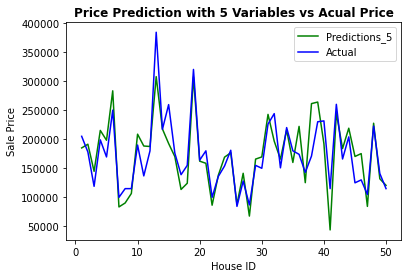

In [72]:
Ypredictions_5=predictions_5[0:50]
Yactual=SalePrice[0:50]
ID = list(range(1, 51))
plt.plot(ID, Ypredictions_5, 'g', label="Predictions_5")
plt.plot(ID, Yactual, 'b', label="Actual")
plt.xlabel('House ID') 
plt.ylabel('Sale Price') 
plt.title("Price Prediction with 5 Variables vs Acual Price", 
          fontweight='bold')
leg = plt.legend(loc='upper right')
plt.show()

[Back to top](#Index)

## Conclusion

Describe your conclusions. Explain which approach worked better in terms of results. What did you learn about data analysis techniques by creating your prediction model?



*In conclusion, the model made with all the available numerical variables is far more accurate than the model with only 5 variables. The accuracy score was 93.78% verses 79.34%. This tells us that the more information we use in data analysis the better. It includes the number of data in general, but more importantly the numbers of variables as well.*


[Back to top](#Index
)
## References

Add all references you used to complete this project.

Use this format for articles:
- Author Last Name, Author First Name. “Article Title.” Journal Title Volume #, no. Issue # (year): page range.

- Ex: Doe, John. “Data Engineering.” Data Engineering Journal 18, no. 4 (2021): 12-18.

Use this format for websites:
- Author Last Name, Author First Name. “Title of Web Page.” Name of Website. Publishing organization, publication or revision date if available. Access date if no other date is available. URL .

- Doe, John. “Data Engineering.” Data Engineer Resource. Cengage, 2021. www.dataengineerresource.com .


*Anon, “What is Linear Regression?”, “Statics Solutions” 
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/*

*Bevans, Rebecca, “Multiple Linear Regression | A Quick and Simple Guide”, Scribbr, Feb. 20, 2020”
https://www.scribbr.com/statistics/multiple-linear-regression/*